In [0]:
import numpy as np
import pandas as pd

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
#pd.options.display.float_format = "{:.11f}".format

In [0]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/Support%20vector%20Machine%20%26%20House%20price%20prediction%20dataset/data.csv'
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df.date)
df = df.drop(['country'],axis=1)

3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม
4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [5]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052
5,2014-05-02,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115
6,2014-05-02,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052
7,2014-05-02,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038
8,2014-05-02,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045
9,2014-05-02,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115


In [6]:
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
4590,2014-07-08,380680.555556,4.0,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058
4591,2014-07-08,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126
4592,2014-07-08,252980.000000,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003
4593,2014-07-08,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092
4594,2014-07-09,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030
4595,2014-07-09,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133
4596,2014-07-09,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007
4597,2014-07-09,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059
4598,2014-07-10,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178
4599,2014-07-10,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042


In [7]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
27,2014-05-02,698000.0,4.0,2.25,2200,11250,1.5,0,0,5,1300,900,1920,0,1036 4th St,Kirkland,WA 98033
2356,2014-06-11,329950.0,3.0,2.50,2456,7566,2.0,0,0,3,2456,0,2012,1912,33800-33998 12th Pl SW,Federal Way,WA 98023
4061,2014-07-08,1049000.0,4.0,3.75,4740,126759,2.0,0,0,4,4740,0,1991,0,27125-27131 SE 175th Pl,Issaquah,WA 98027
909,2014-05-19,850000.0,4.0,3.50,2640,5900,2.0,0,2,3,2640,0,1937,1998,6728 40th Ave SW,Seattle,WA 98136
1192,2014-05-22,665000.0,4.0,2.50,2600,17388,2.0,0,0,3,2600,0,1996,0,14623 SE 82nd Ct,Newcastle,WA 98059
4520,2014-06-20,0.0,4.0,2.50,1960,11600,1.0,0,0,5,980,980,1931,0,506 21st St SE,Auburn,WA 98002
3085,2014-06-23,453000.0,4.0,1.75,2120,7420,1.0,0,0,4,1060,1060,1956,0,15619 SE 9th St,Bellevue,WA 98008
3311,2014-06-25,589950.0,5.0,3.00,2790,19439,1.0,0,3,5,1500,1290,1973,0,18823 SE 216th St,Renton,WA 98058
3263,2014-06-24,425000.0,4.0,1.50,1600,6180,1.5,0,0,3,1600,0,1946,0,3856 38th Ave S,Seattle,WA 98118
4221,2014-07-09,599950.0,3.0,3.25,1830,1804,3.0,0,0,3,1830,0,2014,0,1501 NW 90th St,Seattle,WA 98117


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น

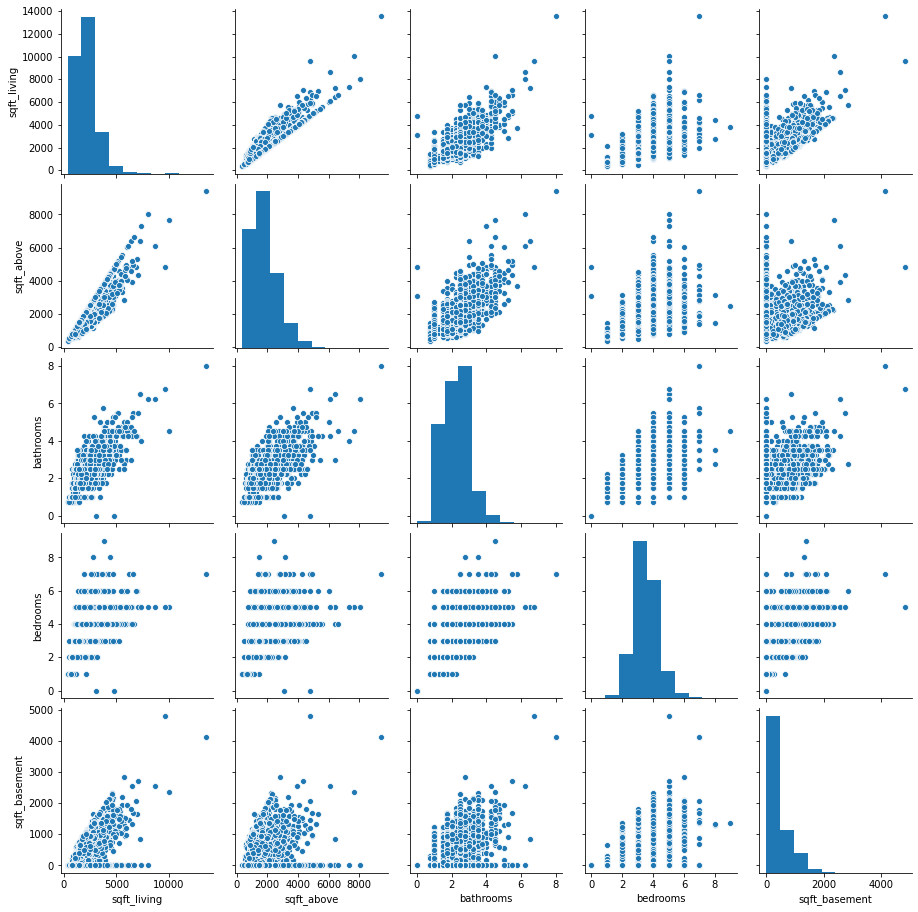

In [9]:
sns.pairplot(df,vars=['sqft_living','sqft_above','bathrooms','bedrooms','sqft_basement'])
#sns.pairplot(df)

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

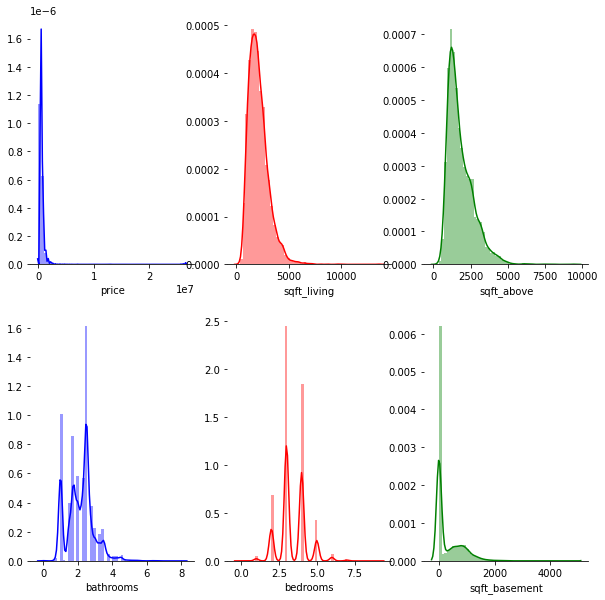

In [10]:
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=False)
sns.despine(left=True)

sns.distplot(df['price'], kde=True, color="b", ax=axes[0, 0])
sns.distplot(df['sqft_living'], kde=True, color="r", ax=axes[0, 1])
sns.distplot(df['sqft_above'], kde=True, color="g", ax=axes[0, 2])
sns.distplot(df['bathrooms'], kde=True, color="b", ax=axes[1, 0])
sns.distplot(df['bedrooms'], kde=True, color="r", ax=axes[1, 1])
sns.distplot(df['sqft_basement'], kde=True, color="g", ax=axes[1, 2])

7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ
8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด
9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

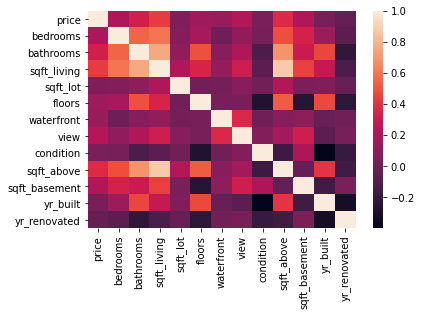

In [11]:
sns.heatmap(df.corr())

In [12]:
corr_matrix = df.corr()
corr_matrix['sqft_living'].sort_values(ascending=False)

sqft_living      1.000000
sqft_above       0.876443
bathrooms        0.761154
bedrooms         0.594884
sqft_basement    0.447206
                   ...   
yr_built         0.287775
sqft_lot         0.210538
waterfront       0.117616
condition       -0.062826
yr_renovated    -0.122817
Name: sqft_living, Length: 13, dtype: float64

In [13]:
df['sqft_lot'].max()

1074218

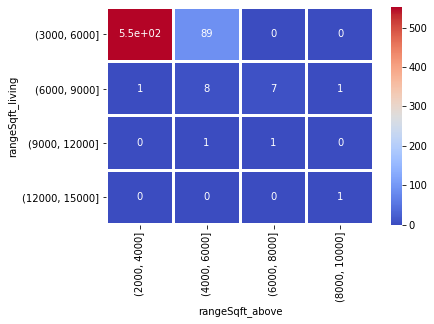

In [14]:
df1 = df
df1['rangeSqft_living'] = pd.cut(df1['sqft_living'],[3000,6000,9000,12000,15000])
df1['rangeSqft_above'] = pd.cut(df1['sqft_above'],[2000,4000,6000,8000,10000])
df1

new_df1 = pd.crosstab(df1['rangeSqft_living'],df1['rangeSqft_above'])
sns.heatmap(new_df1,cmap='coolwarm',annot=True,linecolor='white',linewidths=2)

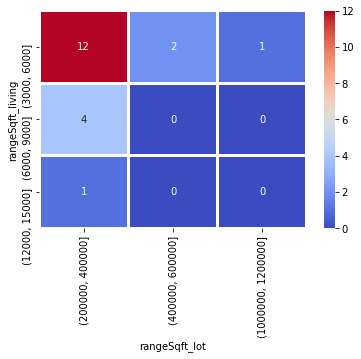

In [15]:
df1 = df
df1['rangeSqft_living'] = pd.cut(df1['sqft_living'],[3000,6000,9000,12000,15000])
df1['rangeSqft_lot'] = pd.cut(df1['sqft_lot'],[200000,400000,600000,800000,1000000,1200000])
df1

new_df1 = pd.crosstab(df1['rangeSqft_living'],df1['rangeSqft_lot'])
sns.heatmap(new_df1,cmap='coolwarm',annot=True,linecolor='white',linewidths=2)

10. สร้าง histogram ของ price

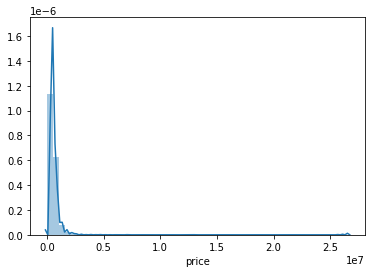

In [16]:
sns.distplot(df['price'],bins=50)

11. สร้าง box plot ของราคา

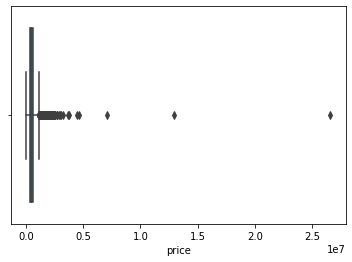

In [17]:
sns.boxplot(df['price'])

12. สร้าง train/test split ของบ้าน สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจชอบ

13. ทำ Data Transformation และ Data Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

14. เทรนโมเดลแบบ Linear และ rbf ของคู่ที่ผู้เรียนคิดว่าเหมาะสม (ให้เป็น 1 dependent VS 1 independent)

In [19]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X = np.array([df['sqft_living']]).T
y = np.array([df['price']]).T

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y) #1

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 100) #2

regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train) #3

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predic = regressor.predict(X_test) #4

metrics.mean_absolute_error(y_test,y_predic),metrics.mean_squared_error(y_test,y_predic),np.sqrt(metrics.mean_squared_error(y_test,y_predic))

data = [[metrics.mean_absolute_error(y_test,y_predic),metrics.mean_squared_error(y_test,y_predic),np.sqrt(metrics.mean_squared_error(y_test,y_predic))]]

table_data = pd.DataFrame(data,columns=['MAE','MSE','RMSE'],index=['1 valiable,rbf'])        

20. สร้าง scatter plot และ prediction line ของ simple linear regression ที่ดี
ที่สุด และ SVR ( แบบ 1 dependent VS 1 independent) ที่ดีที่สุด

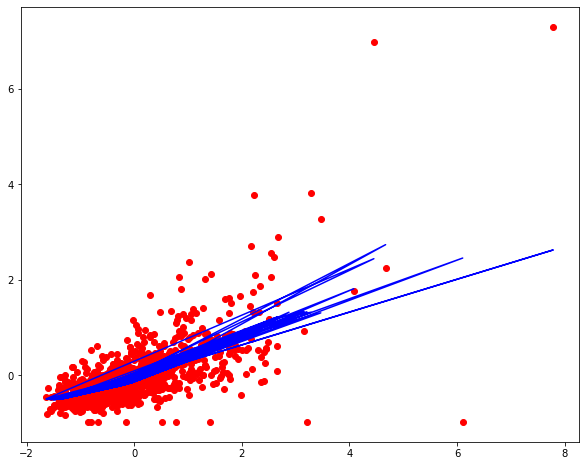

In [21]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_predic,c='blue')
#plt.xlim([0,2])
#plt.ylim([-0.5,1]) #5

In [22]:
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train) #6

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predic = regressor.predict(X_test) #7

metrics.mean_absolute_error(y_test,y_predic),metrics.mean_squared_error(y_test,y_predic),np.sqrt(metrics.mean_squared_error(y_test,y_predic))

data = [[metrics.mean_absolute_error(y_test,y_predic),metrics.mean_squared_error(y_test,y_predic),np.sqrt(metrics.mean_squared_error(y_test,y_predic))]]

table_data_2 = pd.DataFrame(data,columns=['MAE','MSE','RMSE'],index=['1 valiable,linear'])

table_data = table_data.append(table_data_2)   
         

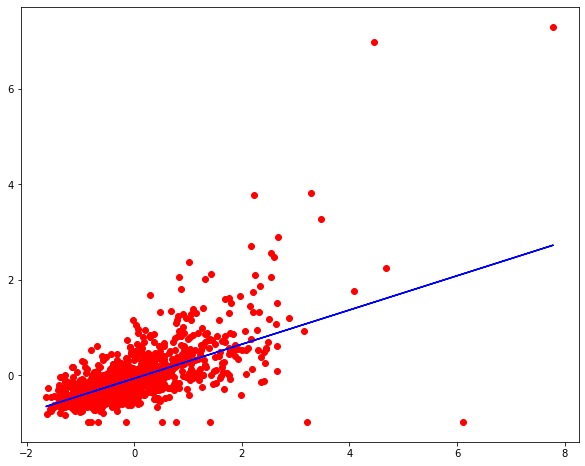

In [24]:
fig = plt.figure(figsize=(10,8)) #8
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_predic,c='blue')

15. เทรนโมเดลแบบ Linear และ rbf ของทั้งหมด หรือ features ที่ผู้เรียนคิดว่าเหมาะสม (ให้เป็น 1 dependent variable VS many independent variables) Hint: คล้ายๆ Multiple Linear Regression แต่ต้องทำ Data Scaling กับทุก
features

16. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE

In [0]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X = df[['sqft_living','sqft_above','bathrooms']]
y = np.array([df['price']]).T

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [0]:
# เทรนโมเดลแบบ Multiple Features
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 100)

In [27]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predic = regressor.predict(X_test)

metrics.mean_absolute_error(y_test,y_predic),metrics.mean_squared_error(y_test,y_predic),np.sqrt(metrics.mean_squared_error(y_test,y_predic))

data = [[metrics.mean_absolute_error(y_test,y_predic),metrics.mean_squared_error(y_test,y_predic),np.sqrt(metrics.mean_squared_error(y_test,y_predic))]]

table_data_2 = pd.DataFrame(data,columns=['MAE','MSE','RMSE'],index=['multiple valiable,rbf'])

table_data = table_data.append(table_data_2)

In [29]:
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)

y_predic = regressor.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
metrics.mean_absolute_error(y_test,y_predic),metrics.mean_squared_error(y_test,y_predic),np.sqrt(metrics.mean_squared_error(y_test,y_predic))

data = [[metrics.mean_absolute_error(y_test,y_predic),metrics.mean_squared_error(y_test,y_predic),np.sqrt(metrics.mean_squared_error(y_test,y_predic))]]

table_data_2 = pd.DataFrame(data,columns=['MAE','MSE','RMSE'],index=['multiple valiable,linear'])

table_data = table_data.append(table_data_2)

17. เทรนโมเดลแบบ Simple Linear Regression และ Multiple Linear
Regression (สามารถเลือกคู่ได้ หรือ จะลองทุกคู่ก็ได้ ตามความคิดของผู้เรียน)
18. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE ของ Linear Regression

In [31]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X = np.array([df['sqft_living']]).T
y = np.array([df['price']]).T
#y = df['price']

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
     
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 100)

lm = LinearRegression()
lm.fit(X_train,y_train)

lm.intercept_,lm.coef_

(array([0.00399186]), array([[0.42614778]]))

In [0]:
y_predict = lm.predict(X_test)
metrics.mean_absolute_error(y_test,y_predict),metrics.mean_squared_error(y_test,y_predict),np.sqrt(metrics.mean_squared_error(y_test,y_predict))

data = [[metrics.mean_absolute_error(y_test,y_predict),metrics.mean_squared_error(y_test,y_predict),np.sqrt(metrics.mean_squared_error(y_test,y_predict))]]

table_data_2 = pd.DataFrame(data,columns=['MAE','MSE','RMSE'],index=['1 valiable,simple linear'])

table_data = table_data.append(table_data_2)

20. สร้าง scatter plot และ prediction line ของ simple linear regression ที่ดี
ที่สุด และ SVR ( แบบ 1 dependent VS 1 independent) ที่ดีที่สุด

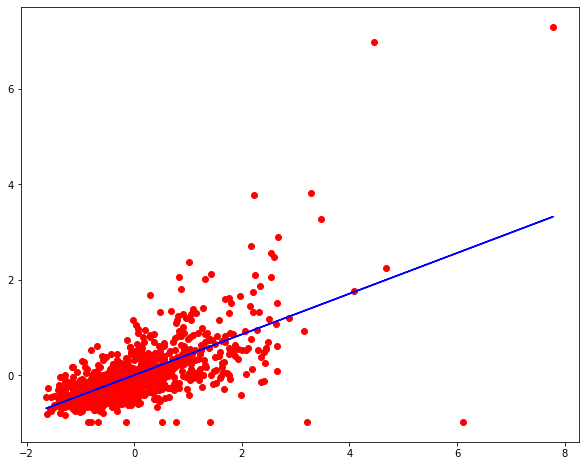

In [33]:
fig = plt.figure(figsize=(10,8)) #8
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_predict,c='blue')

In [34]:
X = df[['sqft_living','sqft_above','bathrooms']]
y = np.array([df['price']]).T

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
     
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 100)

lm = LinearRegression()
lm.fit(X_train,y_train)

lm.intercept_,lm.coef_

(array([0.00413898]), array([[ 0.45606124, -0.04535167,  0.01326241]]))

In [0]:
y_predict = lm.predict(X_test)
metrics.mean_absolute_error(y_test,y_predict),metrics.mean_squared_error(y_test,y_predict),np.sqrt(metrics.mean_squared_error(y_test,y_predict))

data = [[metrics.mean_absolute_error(y_test,y_predict),metrics.mean_squared_error(y_test,y_predict),np.sqrt(metrics.mean_squared_error(y_test,y_predict))]]

table_data_2 = pd.DataFrame(data,columns=['MAE','MSE','RMSE'],index=['multiple valiable,simple linear'])

table_data = table_data.append(table_data_2)

19. เปรียบเทียบผลลัพธ์ที่ดีที่สุดของ Linear Regression กับ SVR ว่าโมเดลไหนมีประสิทธิภาพมากกว่า

In [36]:
table_data

,MAE,MSE,RMSE
"1 valiable,rbf",0.307776,0.240440,0.490346
"1 valiable,linear",0.310841,0.251790,0.501787
"multiple valiable,rbf",0.310731,0.265990,0.515742
"multiple valiable,linear",0.310779,0.252028,0.502024
"1 valiable,simple linear",0.316057,0.241775,0.491706
"multiple valiable,simple linear",0.315826,0.242159,0.492097
